In [175]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
data_dir = "/content/drive/MyDrive/raw-img"
translate = {
    "cane": "Dog", 
    "cavallo": "Horse", 
    "elefante": "Elephant",
    "farfalla": "Butterfly", 
    "gallina": "Chicken", 
    "gatto": "Cat", 
    "mucca": "Cow", 
    "pecora": "Sheep",
    "ragno": "Spider", 
    "scoiattolo": "Squirrel",  
}

In [155]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
SEED = 42

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_test_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = [translate[name] for name in train_ds.class_names]
num_classes = len(class_names)

print("Classes:", class_names)
print("Number of classes:", num_classes)

Found 26179 files belonging to 10 classes.
Using 18326 files for training.
Found 26179 files belonging to 10 classes.
Using 7853 files for validation.
Classes: ['Dog', 'Horse', 'Elephant', 'Butterfly', 'Chicken', 'Cat', 'Cow', 'Sheep', 'Spider', 'Squirrel']
Number of classes: 10


In [156]:
val_batches = tf.data.experimental.cardinality(val_test_ds)
test_ds = val_test_ds.take(val_batches // 2)
val_ds = val_test_ds.skip(val_batches // 2)

In [157]:
normalization_layer = keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [162]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(128,128,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.GlobalAveragePooling2D(),  # <-- instead of Flatten
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_79 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,050 (433.79 KB)

 Trainable params: 111,050 (433.79 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [166]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS 
)

Epoch 1/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 127s 217ms/step - accuracy: 0.2265 - loss: 2.1463 - val_accuracy: 0.2660 - val_loss: 2.0493
Epoch 2/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 132s 231ms/step - accuracy: 0.3034 - loss: 1.9749 - val_accuracy: 0.3712 - val_loss: 1.8394
Epoch 3/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 128s 224ms/step - accuracy: 0.3694 - loss: 1.8122 - val_accuracy: 0.3789 - val_loss: 1.7772
Epoch 4/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 124s 217ms/step - accuracy: 0.4184 - loss: 1.6793 - val_accuracy: 0.4654 - val_loss: 1.5745
Epoch 5/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 123s 214ms/step - accuracy: 0.4617 - loss: 1.5545 - val_accuracy: 0.5032 - val_loss: 1.4376
Epoch 6/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 128s 223ms/step - accuracy: 0.4885 - loss: 1.4594 - val_accuracy: 0.5277 - val_loss: 1.3667
Epoch 7/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 125s 217ms/step - accuracy: 0.5130 - loss: 1.3949 - val_accuracy: 0.5369 - val_loss: 1.3117
Epoch 8/10
573/573 ━━━━━━━━━━━━━━━━━━━━ 119s 207ms/step - accuracy: 0.5329 -

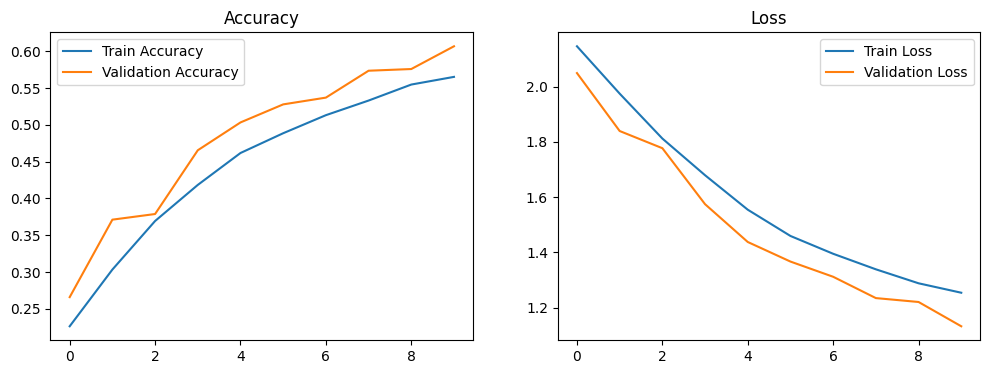

In [167]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [168]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.6029 - loss: 1.1637
Test Accuracy: 0.6028963327407837


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11

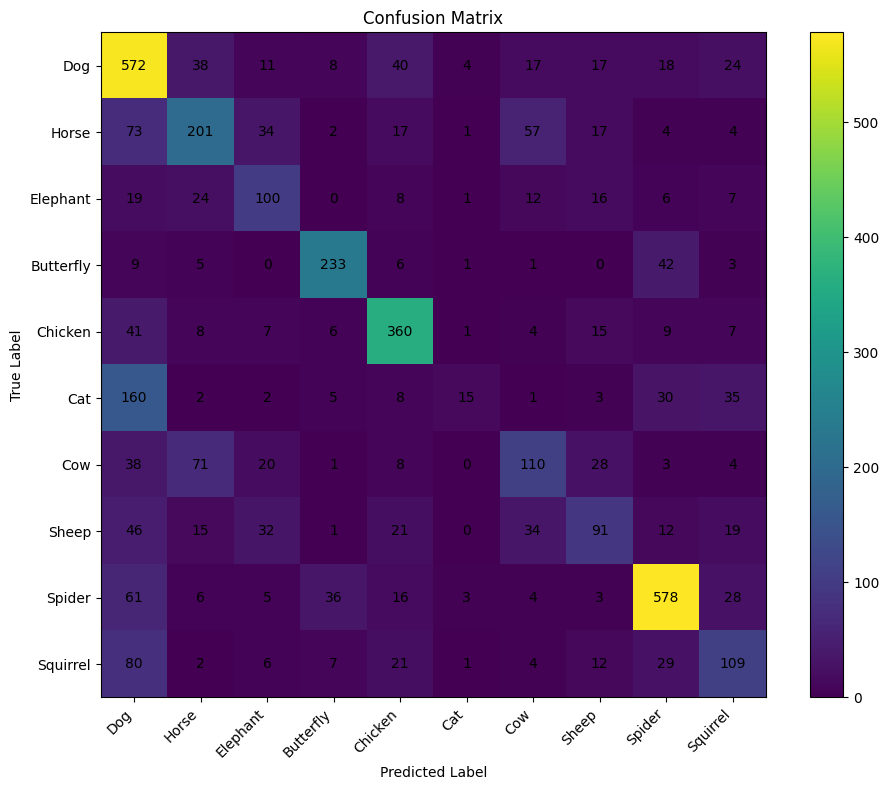

              precision    recall  f1-score   support

         Dog       0.52      0.76      0.62       749
       Horse       0.54      0.49      0.51       410
    Elephant       0.46      0.52      0.49       193
   Butterfly       0.78      0.78      0.78       300
     Chicken       0.71      0.79      0.75       458
         Cat       0.56      0.06      0.10       261
         Cow       0.45      0.39      0.42       283
       Sheep       0.45      0.34      0.38       271
      Spider       0.79      0.78      0.79       740
    Squirrel       0.45      0.40      0.43       271

    accuracy                           0.60      3936
   macro avg       0.57      0.53      0.53      3936
weighted avg       0.60      0.60      0.58      3936



In [169]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha="right")
plt.yticks(tick_marks, class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", color="black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


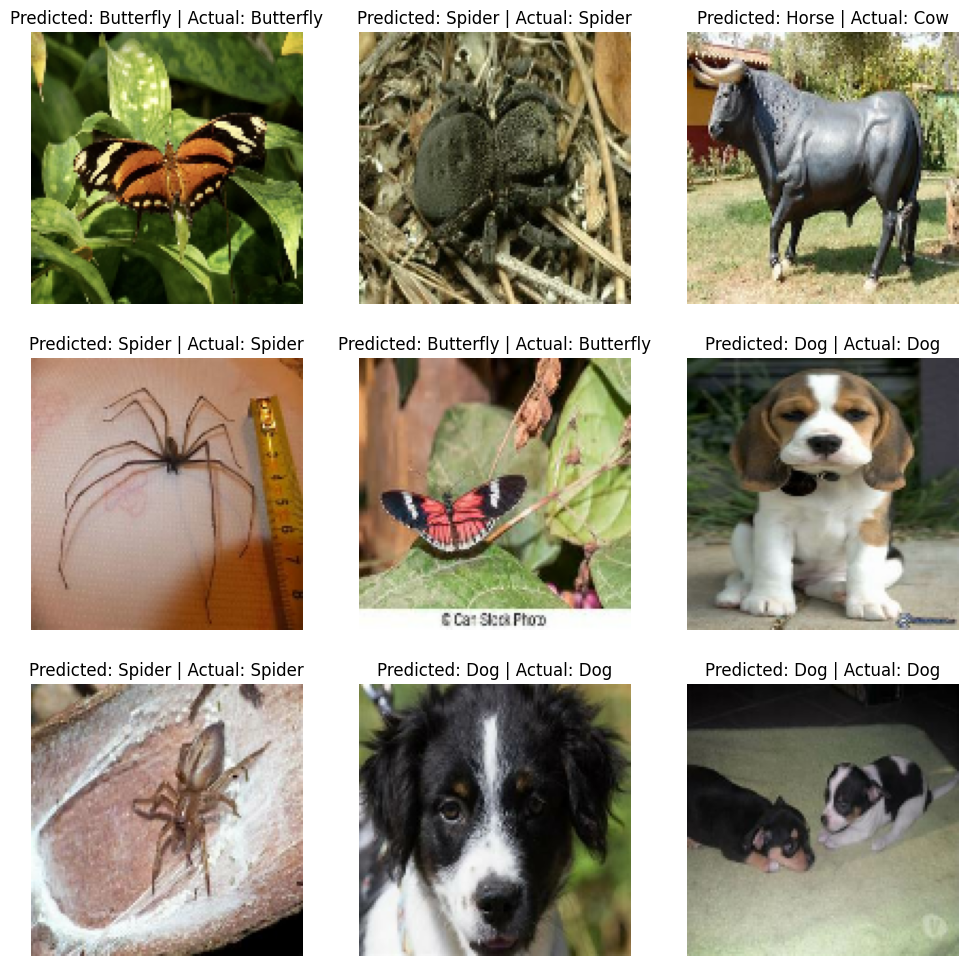

In [174]:
plt.figure(figsize=(12,12))

for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        pred = class_names[np.argmax(predictions[i])]
        true = class_names[labels[i]]
        plt.title(f"Predicted: {pred} | Actual: {true}")
        plt.axis("off")

plt.show()